In [1]:
# !pip install numpy
# !pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
x = random.sample(range(1, 999), 500)

In [3]:
print(len(x))

500


In [4]:
x = np.array(x)

In [5]:
u = x.mean()
std = x.std()

In [6]:
u

493.612

In [7]:
x = (x - u)/std

In [8]:
y = []

for i in x:
    y.append((-2 * i) + 5)

In [9]:
y = np.array(y)

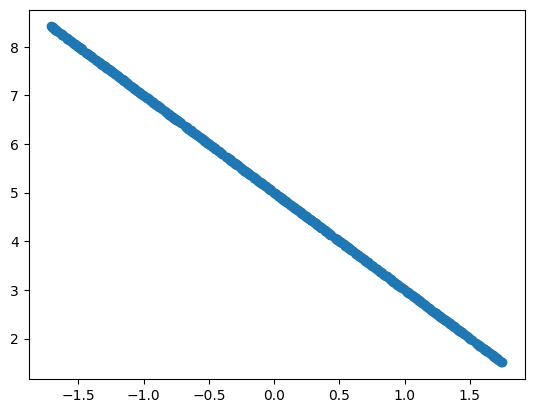

In [10]:
plt.scatter(x, y)

In [11]:
for i in range(10):
    print(x[i], y[i])

0.0013460196970294183 4.997307960605941
0.8374046459447335 3.325190708110533
0.8790341211105943 3.2419317577788114
-0.49820768229330004 5.9964153645866
0.15398742863851897 4.6920251427229624
1.3334892250045747 2.3330215499908507
-0.5016768052237884 6.003353610447577
1.6526485346095072 1.6947029307809856
-0.14782626631397175 5.295652532627943
0.10541970761168139 4.789160584776638


In [12]:
def hypothesis(X, weights):
    pred = weights[0] + weights[1] * X
    return pred

In [13]:
def loss_func(X, Y, weights):
    N = X.shape[0]
    J = 0
    
    for i in range(N):
        y_hat = hypothesis(X[i], weights)
        y_i = Y[i]
        J += (y_i - y_hat)**2
    return J/N

In [14]:
x.shape

(500,)

In [15]:
def gradient(X, Y, weights):
    grad = np.zeros((2, ))
    
    for i in range(X.shape[0]):
        y_hat = hypothesis(X[i], weights)
        
        grad[0] += (y_hat - Y[i]) * 1
        grad[1] += (y_hat - Y[i]) * X[i]
    
    return grad/X.shape[0]

In [16]:
def gradient_descent(X, Y):
    weights = np.zeros((2, ))
    lr_rate = 0.1
    epochs = 1000
    loss_list = []
    
    for i in range(epochs):
        grad = gradient(X, Y, weights)
        
        weights[0] = weights[0] - lr_rate * grad[0]
        weights[1] = weights[1] - lr_rate * grad[1]
        loss_list.append(loss_func(X, Y, weights))
        
    return weights, loss_list

In [17]:
weights, loss_list = gradient_descent(x, y)

In [18]:
loss_list

[23.490000000000002,
 19.026900000000012,
 15.411788999999997,
 12.483549089999997,
 10.111674762900002,
 8.190456557949004,
 6.634269811938699,
 5.3737585476703424,
 4.352744423612979,
 3.525722983126509,
 2.8558356163324734,
 2.313226849229305,
 1.8737137478757346,
 1.5177081357793465,
 1.2293435899812717,
 0.9957683078848293,
 0.8065723293867109,
 0.6533235868032351,
 0.5291921053106211,
 0.428645605301603,
 0.34720294029429827,
 0.28123438163838166,
 0.22779984912708864,
 0.1845178777929422,
 0.1494594810122832,
 0.12106217961994968,
 0.09806036549215935,
 0.07942889604864901,
 0.06433740579940564,
 0.05211329869751845,
 0.04221177194499005,
 0.034191535275441824,
 0.027695143573107844,
 0.022433066294217235,
 0.018170783698315984,
 0.014718334795636024,
 0.011921851184465222,
 0.009656699459416865,
 0.007821926562127662,
 0.006335760515323414,
 0.005131966017411906,
 0.00415689247410363,
 0.0033670829040239585,
 0.0027273371522594384,
 0.002209143093330143,
 0.001789405905597406,


In [19]:
weights

array([ 5., -2.])

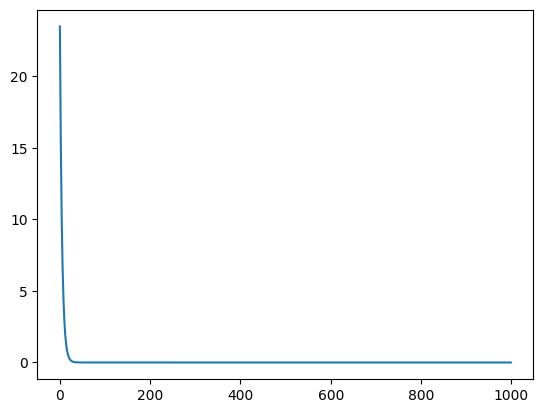

In [20]:
plt.plot(loss_list)

In [21]:
x_test = random.sample(range(1, 999), 500)
x_test = np.array(x_test)

In [22]:
y_test = []

for i in x_test:
    y_test.append(-2 * i + 5)

In [23]:
pred = []
for i in range(x_test.shape[0]):
    print(y_test[i], hypothesis(x_test[i], weights))
    pred.append(hypothesis(x_test[i], weights))

-1031 -1030.9999999999993
-901 -900.9999999999995
-441 -440.9999999999998
-27 -26.999999999999986
-69 -68.99999999999996
-419 -418.9999999999998
-1703 -1702.999999999999
-67 -66.99999999999996
-1523 -1522.999999999999
-1603 -1602.999999999999
-705 -704.9999999999997
-963 -962.9999999999994
-599 -598.9999999999997
-841 -840.9999999999995
-1269 -1268.9999999999993
-1863 -1862.9999999999989
-679 -678.9999999999997
-305 -304.99999999999983
-1541 -1540.999999999999
-337 -336.99999999999983
-1511 -1510.999999999999
-471 -470.9999999999997
-1835 -1834.999999999999
-1309 -1308.9999999999993
-1643 -1642.999999999999
-151 -150.99999999999991
-1181 -1180.9999999999993
-1761 -1760.999999999999
-1615 -1614.999999999999
-1493 -1492.999999999999
-141 -140.99999999999991
-727 -726.9999999999995
-179 -178.9999999999999
-1397 -1396.9999999999993
-1577 -1576.999999999999
-687 -686.9999999999997
-65 -64.99999999999996
-1675 -1674.999999999999
-1433 -1432.999999999999
-587 -586.9999999999997
-1645 -1644.99

In [24]:
# def r2_score(Y_test, pred):
    